In [2]:
# import pandas library
import pandas as pd

# Get the data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('file.tsv', sep='\t', names=column_names)

# Check the head of the data
df.head()


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
movie_titles=pd.read_csv('Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:

data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
# Calculate mean rating of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()


title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [6]:
# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [7]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

ratings.head()


,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline


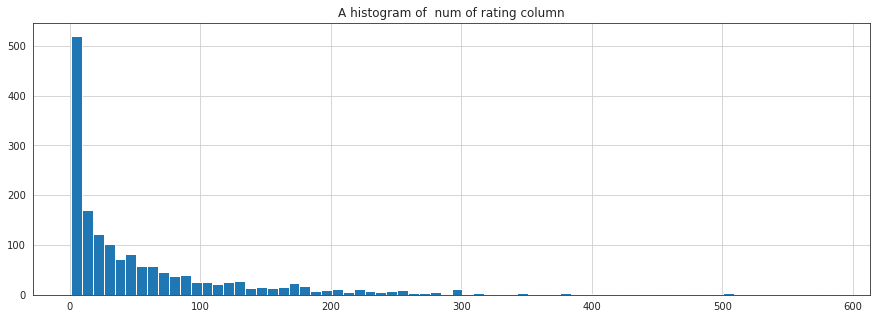

In [9]:
# plot graph of 'num of ratings column'
plt.figure(figsize =(15, 5))

ratings['num of ratings'].hist(bins = 70)
plt.title('A histogram of  num of rating column')
plt.show()

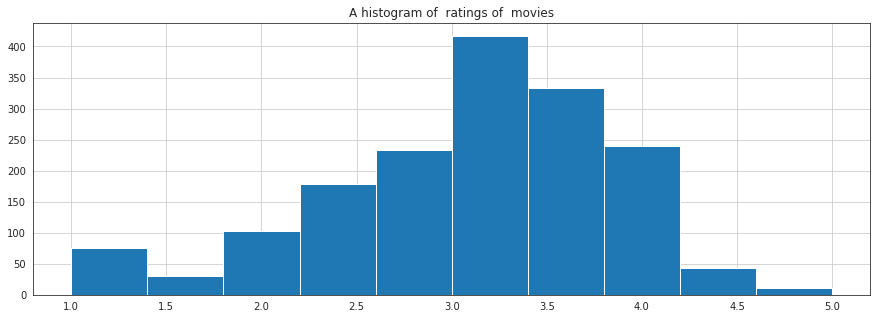

In [10]:
plt.figure(figsize=(15,5))
ratings.rating.hist()
plt.title('A histogram of  ratings of  movies')
plt.show()

In [11]:
# Sorting values according to the 'num of rating column'
moviemat = data.pivot_table(index ='user_id',
columns ='title', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)


# movied=data.pivot_table(index='user_id',columns='title',values='rating')
# movied.head()
ratings.sort_values('num of ratings',ascending=False).head(10)


,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [13]:

# analysing correlation with similar movies
toy_user_ratings = moviemat['Toy Story (1995)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
 
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [14]:

# analysing correlation with similar movies
similar_to_toy = moviemat.corrwith(toy_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
 
corr_toy = pd.DataFrame(similar_to_toy, columns =['Correlation'])
corr_toy.dropna(inplace = True)
 
corr_toy.head()

/home/karimi/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/karimi/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


In [15]:
# Similar movies like story toy
corr_toy.sort_values('Correlation', ascending = False).head(10)
corr_toy = corr_toy.join(ratings['num of ratings'])

corr_toy.head()

corr_toy[corr_toy['num of ratings']>100].sort_values('Correlation', ascending = False).head()


,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175


In [16]:
# Similar movies as of liarliar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()


,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
